# Transformers: Hoe AI tekst begrijpt en vertaalt

ChatGPT, Claude, Google Translate — ze gebruiken allemaal **transformers**. Maar wat is dat?

In dit notebook leggen we transformers uit zonder ingewikkelde wiskunde. Je leert:
1. Wat het probleem was dat transformers oplossen
2. Hoe de **encoder** werkt (begrijpen van tekst)
3. Hoe de **decoder** werkt (genereren van tekst)
4. Hoe ze samenwerken (bijvoorbeeld bij vertalen)
5. Wat **attention** betekent

---
**Instructie:** Voer iedere cel uit met **Shift+Enter**

## Het probleem: Context begrijpen

Oude AI-modellen lazen tekst als een mens die maar 1 woord tegelijk kon onthouden. Bij deze zin:

> "De kat zat op de mat omdat **hij** moe was"

Wat betekent "hij"? Voor een mens is het duidelijk: de kat. Maar een simpel model weet niet dat "hij" terug verwijst naar "de kat".

**Transformers lossen dit op door alle woorden tegelijk te bekijken en te begrijpen hoe ze met elkaar samenhangen.**

## De twee delen: Encoder en Decoder

Een transformer heeft twee delen:

### 1. **Encoder** = De Lezer
- Leest de invoer (bijvoorbeeld een Nederlandse zin)
- Begrijpt de betekenis van elk woord in de context
- Maakt een "begrip" van de hele zin

### 2. **Decoder** = De Schrijver
- Neemt het "begrip" van de encoder
- Genereert de uitvoer (bijvoorbeeld een Engelse vertaling)
- Schrijft woord voor woord

**Voorbeeld:**
```
Nederlands: "De kat zit op de mat"
           ↓
      [ENCODER] → begrijpt de betekenis
           ↓
      [DECODER] → schrijft Engels
           ↓
Engels: "The cat sits on the mat"
```

## De Encoder: Tekst begrijpen

Stel je voor dat de encoder een groep experts is. Elk expert kijkt naar de zin en merkt verschillende dingen op:

**Zin:** "De bank aan de rivier was groen"

- Expert 1: "bank + rivier → het gaat om een zitbank buiten, niet om een geldbank"
- Expert 2: "groen → beschrijft de bank"
- Expert 3: "aan de rivier → locatie van de bank"

De encoder combineert al deze inzichten en maakt voor elk woord een "begrip" dat de context bevat.

Dit gebeurt via **self-attention**: elk woord "let op" alle andere woorden om context te begrijpen.

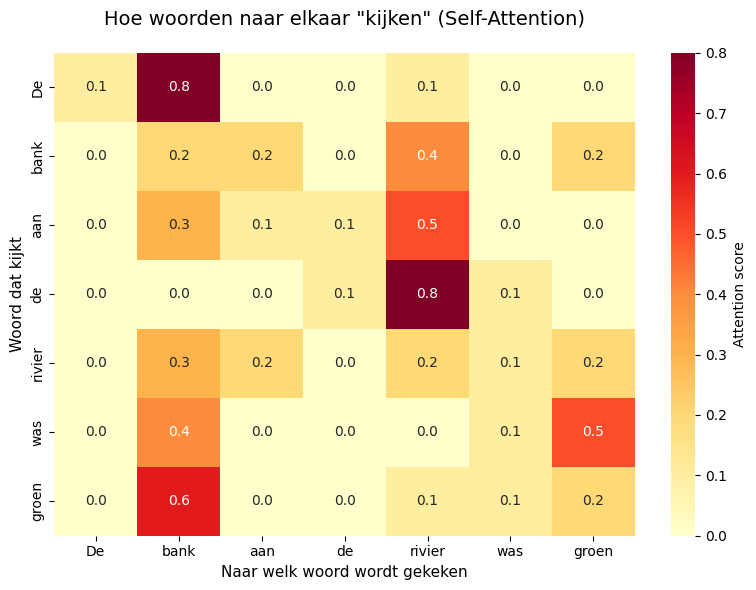

Interpretatie:
- 'bank' kijkt vooral naar 'rivier' (0.4) en 'groen' (0.2)
- 'groen' kijkt vooral naar 'bank' (0.6) → het beschrijft de bank
- Zo begrijpt het model dat 'bank' hier een zitbank is, geen geldinstelling


In [5]:
# Laten we visualiseren hoe woorden naar elkaar "kijken"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Voorbeeld zin
woorden = ["De", "bank", "aan", "de", "rivier", "was", "groen"]

# Simuleer attention scores (hoe belangrijk is elk woord voor elk ander woord?)
# In echte transformers wordt dit berekend, hier maken we een voorbeeld
attention = np.array([
    [0.1, 0.8, 0.0, 0.0, 0.1, 0.0, 0.0],  # "De" let vooral op "bank"
    [0.0, 0.2, 0.2, 0.0, 0.4, 0.0, 0.2],  # "bank" let op "rivier" en "groen"
    [0.0, 0.3, 0.1, 0.1, 0.5, 0.0, 0.0],  # "aan" let op "rivier"
    [0.0, 0.0, 0.0, 0.1, 0.8, 0.1, 0.0],  # "de" let op "rivier"
    [0.0, 0.3, 0.2, 0.0, 0.2, 0.1, 0.2],  # "rivier" let op "bank"
    [0.0, 0.4, 0.0, 0.0, 0.0, 0.1, 0.5],  # "was" let op "bank" en "groen"
    [0.0, 0.6, 0.0, 0.0, 0.1, 0.1, 0.2],  # "groen" let vooral op "bank"
])

plt.figure(figsize=(8, 6))
sns.heatmap(attention, xticklabels=woorden, yticklabels=woorden, 
            cmap='YlOrRd', annot=True, fmt='.1f', cbar_kws={'label': 'Attention score'})
plt.title('Hoe woorden naar elkaar "kijken" (Self-Attention)', fontsize=14, pad=20)
plt.xlabel('Naar welk woord wordt gekeken', fontsize=11)
plt.ylabel('Woord dat kijkt', fontsize=11)
plt.tight_layout()
plt.show()

print("Interpretatie:")
print("- 'bank' kijkt vooral naar 'rivier' (0.4) en 'groen' (0.2)")
print("- 'groen' kijkt vooral naar 'bank' (0.6) → het beschrijft de bank")
print("- Zo begrijpt het model dat 'bank' hier een zitbank is, geen geldinstelling")

## De Decoder: Tekst genereren

De decoder werkt andersom. Hij genereert tekst **woord voor woord**:

1. Hij kijkt naar wat hij al heeft geschreven
2. Hij kijkt naar het begrip van de encoder
3. Hij voorspelt het volgende woord

**Voorbeeld van vertalen:**
```
Encoder begrip: [De kat zit op de mat]

Decoder:
Stap 1: <start> → voorspelt "The"
Stap 2: "The" → voorspelt "cat"
Stap 3: "The cat" → voorspelt "sits"
Stap 4: "The cat sits" → voorspelt "on"
...
```

Bij elke stap gebruikt de decoder **twee soorten attention**:
- **Self-attention**: kijkt naar wat hij al heeft geschreven
- **Cross-attention**: kijkt naar de originele tekst van de encoder

## Encoder vs Decoder: Wanneer gebruik je wat?

Niet alle taken hebben beide nodig:

| Taak | Gebruikt | Voorbeeld |
|------|----------|----------|
| Tekst **begrijpen** (classificatie) | Alleen Encoder | BERT: "Is deze review positief of negatief?" |
| Tekst **genereren** | Alleen Decoder | GPT: "Schrijf een verhaal over..." |
| Tekst **transformeren** (vertalen) | Encoder + Decoder | Google Translate: Nederlands → Engels |

**ChatGPT gebruikt alleen een decoder** (GPT = Generative Pre-trained Transformer), maar de decoder heeft wel self-attention zoals de encoder.

## Attention uitgelegd met een analogie

**Stel je voor:** Je leest een detective-roman. 

Op pagina 200 staat: *"Hij pakte het wapen dat hij drie dagen eerder had verstopt"*

Om dit te begrijpen moet je:
1. Terug bladeren naar pagina 150 waar het wapen werd verstopt
2. Die context combineren met wat je nu leest

**Dat is attention!** Het model "bladert terug" en kijkt naar eerdere woorden die belangrijk zijn voor het huidige woord.

In een transformer gebeurt dit automatisch voor elk woord met elk ander woord.

In [6]:
# Een simpele demonstratie: welke woorden zijn belangrijk voor betekenis?

def toon_attention(zin, focus_woord_index):
    """
    Visualiseer welke woorden belangrijk zijn voor een specifiek woord
    """
    woorden = zin.split()
    focus = woorden[focus_woord_index]
    
    # Simuleer attention scores (in echt wordt dit door het model berekend)
    # Hier maken we handmatig een voorbeeld
    scores = [0.1] * len(woorden)
    
    # Voor demonstratie: maak sommige woorden belangrijker
    if "verstopt" in zin and focus == "Hij":
        # "Hij" verwijst naar wie het wapen verstopte
        if "detective" in woorden:
            scores[woorden.index("detective")] = 0.7
    
    if "eerder" in zin and focus == "wapen":
        # "wapen" is gekoppeld aan "verstopt"
        if "verstopt" in woorden:
            scores[woorden.index("verstopt")] = 0.8
    
    # Normaliseer
    total = sum(scores)
    scores = [s/total for s in scores]
    
    # Visualiseer
    print(f"\nWelke woorden zijn belangrijk voor '{focus}'?\n")
    for woord, score in zip(woorden, scores):
        bar = '█' * int(score * 50)
        print(f"{woord:15} {bar} {score:.2f}")

# Test
zin = "De detective pakte het wapen dat hij verstopt had"
print("="*60)
print(f"Zin: {zin}")
print("="*60)

toon_attention(zin, 1)  # Focus op "detective"

Zin: De detective pakte het wapen dat hij verstopt had

Welke woorden zijn belangrijk voor 'detective'?

De              █████ 0.11
detective       █████ 0.11
pakte           █████ 0.11
het             █████ 0.11
wapen           █████ 0.11
dat             █████ 0.11
hij             █████ 0.11
verstopt        █████ 0.11
had             █████ 0.11


## Hoe Encoder en Decoder samenwerken (bij vertalen)

Laten we het hele proces doorlopen:

### Stap 1: Encoder verwerkt invoer
```
Input: "Ik hou van katten"
→ Encoder maakt begripsrepresentatie van elk woord in context
```

### Stap 2: Decoder genereert uitvoer
```
Decoder krijgt: <start>
+ Encoder begrip van "Ik hou van katten"
→ Voorspelt: "I"

Decoder krijgt: "I"
+ Encoder begrip
→ Voorspelt: "love"

Decoder krijgt: "I love"
+ Encoder begrip (let op: "katten" is meervoud!)
→ Voorspelt: "cats" (niet "cat")
```

De decoder gebruikt **cross-attention** om terug te kijken naar de originele Nederlandse woorden terwijl hij Engels schrijft.

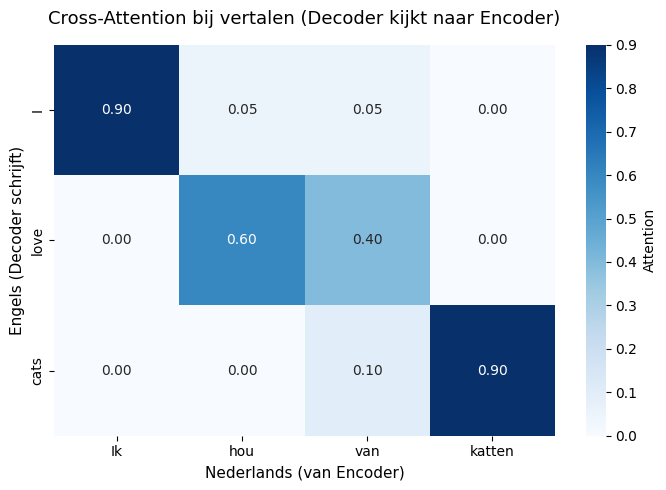

Interpretatie:
- Bij het schrijven van 'I' kijkt de decoder vooral naar 'Ik' (0.90)
- Bij 'love' kijkt hij naar 'hou' (0.60) en 'van' (0.40)
- Bij 'cats' kijkt hij naar 'katten' (0.90)

Zo 'vertaalt' de decoder terwijl hij het origineel in gedachten houdt!


In [7]:
# Visualiseer cross-attention bij vertalen
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Voorbeeld vertaling
nl_woorden = ["Ik", "hou", "van", "katten"]
en_woorden = ["I", "love", "cats"]

# Cross-attention: welk Engels woord let op welk Nederlands woord?
cross_attention = np.array([
    [0.9, 0.05, 0.05, 0.0],   # "I" kijkt vooral naar "Ik"
    [0.0, 0.6, 0.4, 0.0],     # "love" kijkt naar "hou" en "van"
    [0.0, 0.0, 0.1, 0.9],     # "cats" kijkt vooral naar "katten"
])

plt.figure(figsize=(7, 5))
sns.heatmap(cross_attention, 
            xticklabels=nl_woorden, 
            yticklabels=en_woorden,
            cmap='Blues', 
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Attention'})
plt.title('Cross-Attention bij vertalen (Decoder kijkt naar Encoder)', fontsize=13, pad=15)
plt.xlabel('Nederlands (van Encoder)', fontsize=11)
plt.ylabel('Engels (Decoder schrijft)', fontsize=11)
plt.tight_layout()
plt.show()

print("Interpretatie:")
print("- Bij het schrijven van 'I' kijkt de decoder vooral naar 'Ik' (0.90)")
print("- Bij 'love' kijkt hij naar 'hou' (0.60) en 'van' (0.40)")
print("- Bij 'cats' kijkt hij naar 'katten' (0.90)")
print("\nZo 'vertaalt' de decoder terwijl hij het origineel in gedachten houdt!")

## Waarom zijn Transformers zo krachtig?

### 1. **Parallelle verwerking**
Oude modellen (RNN/LSTM) moesten woorden één voor één verwerken. Transformers bekijken alle woorden tegelijk → veel sneller.

### 2. **Lange-afstand relaties**
Woord 1 kan direct communiceren met woord 1000. Geen probleem met vergeten van context.

### 3. **Multi-head attention**
Het model heeft meerdere "attention heads" - elk let op andere aspecten:
- Head 1: grammaticale relaties (onderwerp-werkwoord)
- Head 2: semantische relaties (synoniemen)
- Head 3: lange-afstand verwijzingen (hij → de kat)

### 4. **Schaalbaarheid**
Je kunt ze groter maken (meer layers, meer parameters) en ze blijven beter werken.

## Samenvatting

```
TRANSFORMER
│
├── ENCODER (begrijpt tekst)
│   ├── Self-Attention: woorden kijken naar elkaar
│   ├── Begrijpt context: "bank" bij "rivier" ≠ "bank" bij "geld"
│   └── Output: begripsrepresentatie
│
└── DECODER (genereert tekst)
    ├── Self-Attention: kijkt naar al geschreven woorden
    ├── Cross-Attention: kijkt naar encoder output
    └── Output: woord voor woord nieuwe tekst
```

**Belangrijkste concept:** Attention = het model leert zelf welke woorden belangrijk zijn voor welke andere woorden.

## Experimenteer zelf!

Probeer verschillende zinnen en kijk hoe woorden naar elkaar "zouden moeten kijken".

Probeer deze zinnen of verzin je eigen:
1. 'De grote rode auto staat in de straat'
2. 'Hij pakte het boek dat zij had gelezen'
3. 'De kat jaagt de muis door het huis'



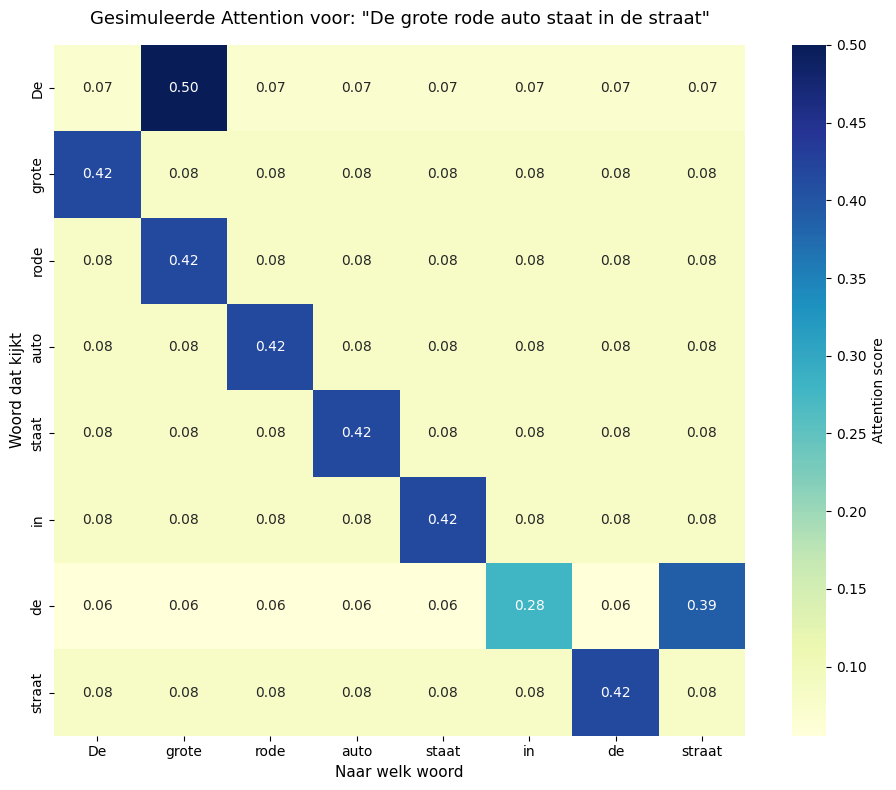

In [8]:
# EXPERIMENT 1: Welke woorden zijn belangrijk voor elkaar?

def simuleer_attention(zin):
    """
    Simuleer welke woorden belangrijk zijn voor elkaar.
    Dit is een vereenvoudigde versie - echte transformers berekenen dit automatisch.
    """
    woorden = zin.split()
    n = len(woorden)
    
    # Maak basis attention matrix (elk woord let een beetje op alles)
    attention = np.ones((n, n)) * 0.1
    
    # Voeg wat logica toe (simpel, niet perfect)
    for i, woord in enumerate(woorden):
        # Lidwoorden kijken naar het volgende zelfstandig naamwoord
        if woord.lower() in ['de', 'het', 'een']:
            if i + 1 < n:
                attention[i, i+1] = 0.7
        
        # Bijvoeglijke naamwoorden kijken naar zelfstandig naamwoord
        if i > 0 and woord[0].isupper() == False:  # Simpele heuristiek
            attention[i, max(0, i-1)] = 0.5
    
    # Normaliseer rijen
    attention = attention / attention.sum(axis=1, keepdims=True)
    
    # Visualiseer
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention, 
                xticklabels=woorden, 
                yticklabels=woorden,
                cmap='YlGnBu', 
                annot=True, 
                fmt='.2f',
                square=True,
                cbar_kws={'label': 'Attention score'})
    plt.title(f'Gesimuleerde Attention voor: "{zin}"', fontsize=13, pad=15)
    plt.xlabel('Naar welk woord', fontsize=11)
    plt.ylabel('Woord dat kijkt', fontsize=11)
    plt.tight_layout()
    plt.show()

# Probeer verschillende zinnen!
print("Probeer deze zinnen of verzin je eigen:")
print("1. 'De grote rode auto staat in de straat'")
print("2. 'Hij pakte het boek dat zij had gelezen'")
print("3. 'De kat jaagt de muis door het huis'\n")

# Pas hier je eigen zin aan!
jouw_zin = "De grote rode auto staat in de straat"
simuleer_attention(jouw_zin)

In [9]:
# EXPERIMENT 2: Simuleer een simpele "vertaling"

# Simpel woordenboek (in het echt heeft het model dit geleerd)
vertaalwoordenboek = {
    'ik': 'I', 'jij': 'you', 'hij': 'he', 'zij': 'she',
    'de': 'the', 'een': 'a', 'het': 'the',
    'kat': 'cat', 'hond': 'dog', 'katten': 'cats', 'honden': 'dogs',
    'hou': 'love', 'houdt': 'loves', 'houd': 'love',
    'van': 'of', 'op': 'on', 'in': 'in',
    'zit': 'sits', 'zat': 'sat', 'staat': 'stands',
    'mat': 'mat', 'bank': 'bench', 'stoel': 'chair',
    'rent': 'runs', 'loopt': 'walks', 'speelt': 'plays'
}

def simpele_vertaling(nl_zin):
    """
    Super simpele "vertaling" - echte transformers zijn veel slimmer!
    """
    woorden = nl_zin.lower().split()
    vertaald = []
    
    print(f"\nOrigineel: {nl_zin}")
    print("\nStap-voor-stap vertaling:")
    print("-" * 50)
    
    for i, woord in enumerate(woorden):
        if woord in vertaalwoordenboek:
            eng_woord = vertaalwoordenboek[woord]
            vertaald.append(eng_woord)
            
            # Simuleer wat de decoder "ziet"
            context_nl = ' '.join(woorden[:i+1])
            context_en = ' '.join(vertaald)
            print(f"Stap {i+1}:")
            print(f"  NL tot nu toe: '{context_nl}'")
            print(f"  EN tot nu toe: '{context_en}'")
            print(f"  → Volgend woord: '{eng_woord}'\n")
        else:
            vertaald.append(woord)
    
    print("=" * 50)
    print(f"Resultaat: {' '.join(vertaald)}")
    print("\n(Let op: dit is een simpele woordelijke vertaling.")
    print("Echte transformers begrijpen grammatica en context!)")

# Probeer zelf zinnen!
print("Probeer een van deze zinnen of maak je eigen zin:")
print("- 'De kat zit op de mat'")
print("- 'Ik hou van katten'")
print("- 'De hond rent in het park'\n")

# Pas hier je zin aan (gebruik woorden uit het woordenboek hierboven)
jouw_nederlandse_zin = "De kat zit op de mat"
simpele_vertaling(jouw_nederlandse_zin)

Probeer een van deze zinnen of maak je eigen zin:
- 'De kat zit op de mat'
- 'Ik hou van katten'
- 'De hond rent in het park'


Origineel: De kat zit op de mat

Stap-voor-stap vertaling:
--------------------------------------------------
Stap 1:
  NL tot nu toe: 'de'
  EN tot nu toe: 'the'
  → Volgend woord: 'the'

Stap 2:
  NL tot nu toe: 'de kat'
  EN tot nu toe: 'the cat'
  → Volgend woord: 'cat'

Stap 3:
  NL tot nu toe: 'de kat zit'
  EN tot nu toe: 'the cat sits'
  → Volgend woord: 'sits'

Stap 4:
  NL tot nu toe: 'de kat zit op'
  EN tot nu toe: 'the cat sits on'
  → Volgend woord: 'on'

Stap 5:
  NL tot nu toe: 'de kat zit op de'
  EN tot nu toe: 'the cat sits on the'
  → Volgend woord: 'the'

Stap 6:
  NL tot nu toe: 'de kat zit op de mat'
  EN tot nu toe: 'the cat sits on the mat'
  → Volgend woord: 'mat'

Resultaat: the cat sits on the mat

(Let op: dit is een simpele woordelijke vertaling.
Echte transformers begrijpen grammatica en context!)


In [11]:
# EXPERIMENT 3: Context is belangrijk!

def toon_context_verschil(woord, context1, context2):
    """
    Laat zien hoe hetzelfde woord verschillende betekenis heeft in verschillende contexten.
    Dit is waar attention essentieel is!
    """
    print(f"\nHet woord: '{woord}'\n")
    print("=" * 60)
    print(f"Context 1: {context1}")
    print(f"Context 2: {context2}")
    print("=" * 60)
    
    # Analyseer welke woorden belangrijk zijn
    woorden1 = context1.split()
    woorden2 = context2.split()
    
    print(f"\nOm '{woord}' te begrijpen moet het model letten op:")
    print(f"\nIn context 1: belangrijke woorden zijn waarschijnlijk:")
    for w in woorden1:
        if w != woord and w.lower() not in ['de', 'het', 'een', 'is', 'was']:
            print(f"  - '{w}'")
    
    print(f"\nIn context 2: belangrijke woorden zijn waarschijnlijk:")
    for w in woorden2:
        if w != woord and w.lower() not in ['de', 'het', 'een', 'is', 'was']:
            print(f"  - '{w}'")
    
    print("\nDit is waarom attention zo belangrijk is!")
    print("Het model leert automatisch naar de juiste woorden te kijken.")

# Voorbeelden van woorden met meerdere betekenissen
print("VOORBEELD 1: Het woord 'bank'\n")
toon_context_verschil(
    "bank",
    "De bank aan de rivier was groen",
    "De bank is vandaag gesloten"
)

print("\n" + "="*70 + "\n")
print("VOORBEELD 2: Het woord 'slang'\n")
toon_context_verschil(
    "slang",
    "De slang kronkelde door het gras",
    "De slang was te kort voor de tuin"
)

print("\n" + "="*70)
print("\nProbeer zelf:")
print("Verzin twee zinnen met hetzelfde woord maar verschillende betekenis!")

VOORBEELD 1: Het woord 'bank'


Het woord: 'bank'

Context 1: De bank aan de rivier was groen
Context 2: De bank is vandaag gesloten

Om 'bank' te begrijpen moet het model letten op:

In context 1: belangrijke woorden zijn waarschijnlijk:
  - 'aan'
  - 'rivier'
  - 'groen'

In context 2: belangrijke woorden zijn waarschijnlijk:
  - 'vandaag'
  - 'gesloten'

Dit is waarom attention zo belangrijk is!
Het model leert automatisch naar de juiste woorden te kijken.


VOORBEELD 2: Het woord 'slang'


Het woord: 'slang'

Context 1: De slang kronkelde door het gras
Context 2: De slang was te kort voor de tuin

Om 'slang' te begrijpen moet het model letten op:

In context 1: belangrijke woorden zijn waarschijnlijk:
  - 'kronkelde'
  - 'door'
  - 'gras'

In context 2: belangrijke woorden zijn waarschijnlijk:
  - 'te'
  - 'kort'
  - 'voor'
  - 'tuin'

Dit is waarom attention zo belangrijk is!
Het model leert automatisch naar de juiste woorden te kijken.


Probeer zelf:
Verzin twee zinnen met hetze

In [12]:
# EXPERIMENT 4: Jouw eigen zinnen testen!

print("Experimenteer met je eigen zinnen!\n")
print("Verander de variabelen hieronder en voer de cel opnieuw uit:\n")

# PAS DEZE AAN:
jouw_zin_1 = "De muis zit in de hoek"
jouw_zin_2 = "De muis van de computer is kapot"
focus_woord = "muis"

print("="*70)
print(f"Woord: '{focus_woord}'\n")
print(f"Zin 1: {jouw_zin_1}")
print(f"Zin 2: {jouw_zin_2}")
print("="*70)

print(f"\nIn een transformer zou '{focus_woord}' in zin 1 vooral letten op:")
for woord in jouw_zin_1.split():
    if woord.lower() not in ['de', 'het', 'een', 'is', 'in', 'op', 'van', focus_woord.lower()]:
        print(f"  → {woord}")

print(f"\nIn een transformer zou '{focus_woord}' in zin 2 vooral letten op:")
for woord in jouw_zin_2.split():
    if woord.lower() not in ['de', 'het', 'een', 'is', 'in', 'op', 'van', focus_woord.lower()]:
        print(f"  → {woord}")

print("\nDoor naar verschillende woorden te 'kijken' begrijpt het model")
print(f"dat '{focus_woord}' twee verschillende betekenissen heeft!")

Experimenteer met je eigen zinnen!

Verander de variabelen hieronder en voer de cel opnieuw uit:

Woord: 'muis'

Zin 1: De muis zit in de hoek
Zin 2: De muis van de computer is kapot

In een transformer zou 'muis' in zin 1 vooral letten op:
  → zit
  → hoek

In een transformer zou 'muis' in zin 2 vooral letten op:
  → computer
  → kapot

Door naar verschillende woorden te 'kijken' begrijpt het model
dat 'muis' twee verschillende betekenissen heeft!


## Conclusie

Je hebt nu geleerd:

✓ Wat transformers zijn en waarom ze belangrijk zijn  
✓ Hoe de **encoder** tekst begrijpt door naar alle woorden tegelijk te kijken  
✓ Hoe de **decoder** nieuwe tekst genereert woord voor woord  
✓ Wat **attention** betekent: woorden leren naar relevante andere woorden te kijken  
✓ Hoe encoder en decoder samenwerken bij taken zoals vertalen  

**Het kernidee:** In plaats van tekst woord-voor-woord te lezen, bekijken transformers alle woorden tegelijk en leren ze automatisch welke woorden belangrijk zijn voor welke andere woorden.

Dit maakt ze extreem krachtig voor:
- Vertalen (Google Translate)
- Tekst genereren (ChatGPT, Claude)
- Tekst begrijpen (sentiment analyse, classificatie)
- En nog veel meer!

---

**Volgende stap:** Probeer de experimenten hierboven aan te passen met je eigen zinnen en woorden!